# Linear Regression: The fundamentals of predictive modeling

## 예측 모형(Predictive models)
- 수치 예측 - Amazon 내년 주식 가격을 예측
- 레이블이나 등급 예측 - 고객이 서비스 구매를 중단하고 경쟁업체로 전환할 가능성을 예측

#### 수치 예측
- 예측(Forecasting)
- 회귀 분석(Regression analysis)

## 예측(Forcasting)
- 시계열 데이터의 미래 숫자 값을 예측하는 데 사용되는 기술
- 가장 간단한 예측 방법은 단순 이동 평균(simple moving average, SMA)

##### 이동평균(moving average)
- 어떤 것이 방향성을 가지고 움직일 때, 이동하면서 구해지는 평균

##### 단순이동평균(SMA)
- n번째 데이터의 단순이동평균 = n번째 데이터를 포함한 왼쪽  m개의 데이터의 산술평균

##### An example of SMA
- 2006년부터 2021년까지 미시시피 주립 대학교(MSU) 입학 지원자 수

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [3]:
msu_df = pd.read_csv('./MSU applications.csv')
msu_df

NameError: name 'pd' is not defined

In [ ]:
msu_df.set_index('Year',drop=True,inplace=True)
msu_df

In [ ]:
application_df = pd.DataFrame(msu_df.N_Applications)
application_df

In [ ]:
application_df.transpose()

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(application_df)
plt.xticks(application_df.index,rotation=90)
plt.show()

In [ ]:
application_df.loc[2017:2021].mean()

In [ ]:
average_df = pd.DataFrame(application_df.loc[2017:2021])
average_df['N_Applications'] = 15901.2
average_df.loc[2022] = 15901.2

In [ ]:
predict_df = pd.DataFrame(application_df.loc[2021]).transpose()
predict_df.loc[2022] = 15901.2
predict_df

In [ ]:
plt.figure(figsize=(7,3))
plt.plot(application_df)
plt.plot(average_df,linestyle='--',c='C1')
plt.plot(predict_df,c='C1')
plt.xticks(application_df.index,rotation=90)
plt.show()

- 가중 MA(weighted MA), 지수 평활(exponential smoothing), 이중 지수 평활(double exponential smoothing) 등과 같은 시계열 데이터를 사용하여 예측하는 더 복잡한 방법이 있슴.
- 1차원 시계열 데이터에서 활용됨.

## 회귀 분석(Regression Analysis)
- 예측자 속성(독립 속성:independent attribute)과 대상(종속 속성:dependent attribute) 속성 간의 관계를 사용하여 값(수치)을 예측하는 작업
- 종속 속성의 값 결정에 영향을 주는 속성을 예측자 또는 독립 속성이라고 한다.
- 종속 속성을 예측하기 위해 독립 속성과 종속 속성 간의 관계를 찾는 방법에 따라 회귀 분석을 분류. 
- 가장 단순하면서도 널리 사용되는 회귀분석 방법 중 하나인 선형회귀, MLP 및 회귀 트리와 같은 다른 기술도 회귀 분석으로 분류

#### 회귀 분석에 필요한 기술

- 가능한 예측 변수(독립 속성)를 발굴하고 수집하는 것은 성공적인 회귀 분석을 수행하는 데 가장 중요한 부분
- 회귀 분석을 지원하기 위해 무엇이 가능한지 찾아보고 필요한 데이터를 검색/수집하고 다양한 소스의 데이터를 융합 및 통합하는 기술 필요.
- 독립 및 종속 속성이 식별되면 다음으로, 이러한 속성 간의 관계를 찾기 위해 적절한 알고리즘을 사용해야 한다.
- 알고리즘을 통해 찾은 관게를 이용하여 종속 속성의 값을 예측

#### 회귀 분석 4단계
1. 독립 및 종속 속성 선정
2. 두 개의 개별 데이터 세트 생성: 독립 속성(data_X) 및 종속 속성(data_y)
3. 모델 생성 및 데이터 세트 적용 
4. 예측

## 선형 회귀(Linear Regression)
- 'Regression'은 이 방법이 회귀 분석을 수행한다는 것을 알려주고 'Linear' 부분은 속성 간의 선형 관계를 이용한다는 것을 의미

 - 선형 회귀 방정식: 종속변수(Target) = 𝛽0 + 𝛽1 × 독립변수1 + 𝛽2 × 독립변수2 + ⋯ + 𝛽n × 독립변수n

#### Ex) 선형 회귀를 이용한 MSU 지원자 수 예측 

In [ ]:
import pandas as pd
msu_df

##### 1. 독립 및 종속 속성 선정
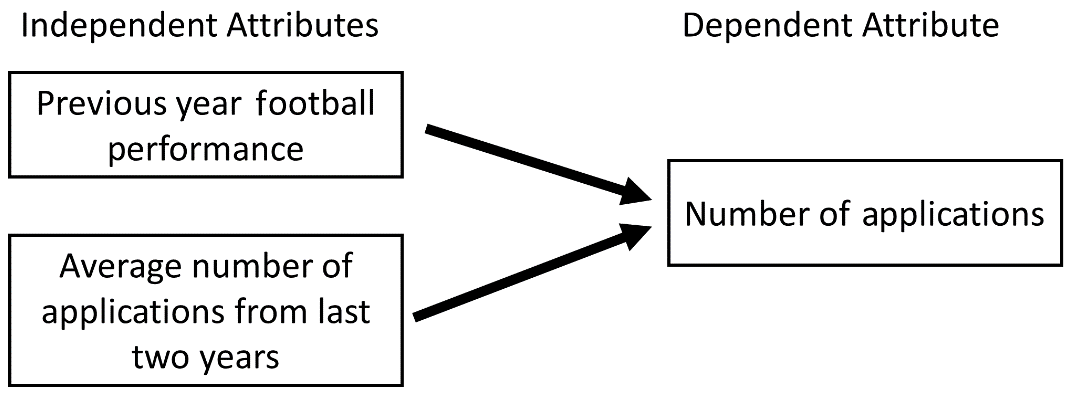

##### 2. 독립 속성(data_X) 및 종속 속성(data_y) 데이터 세트 생성

In [ ]:
from sklearn.linear_model import LinearRegression

X = ['P_Football_Performance','SMAn2']
y = 'N_Applications'

data_X = msu_df[X]
data_y = msu_df[y]

##### 3. 모델 생성 및 데이터 세트 적용

In [ ]:
lm = LinearRegression()
lm.fit(data_X, data_y)

print('intercept (b0) ', lm.intercept_)
coef_names = ['b1','b2']
print(pd.DataFrame({'Predictor': data_X.columns,
                    'coefficient Name':coef_names, 
                    'coefficient Value': lm.coef_}))

##### 4. 예측

###### The trained regression equation
- 𝑁_𝐴plications = −890.71 + 5544.96 × 𝑃_𝐹ootball_𝑃erformance + 0.91 × 𝑆MAn2

In [ ]:
newData = pd.DataFrame({'P_Football_Performance':0.364,'SMAn2':17198}, index=[2022])
newData

In [ ]:
lm.predict(newData)

#### 선형 회귀는 다음 두 가지 목표를 달성
1. 선형 회귀는 독립 속성과 종속 속성 간의 관계를 찾기 위하여 선형 방정식을 사용
2. 선형 회귀 방정식은 향후 예측에 사용할 수 있는 방정식으로 제시 되었음.
- 선형 회귀의 장점은 예측 모델의 작동에 필수적인 "관계의 추출/추정 및 미래 데이터에 대한 예측 관계식 제시"를 매우 쉽게 보고 이해할 수 있다는 것.

## 다층 퍼셉트론(Multi-Layered Perceptron, MLP)
- 선형 회귀가 방정식을 사용하는 반면 MLP는 뉴런 네트워크를 사용하여 독립 속성을 종속 속성에 관계를 제시 
- MLP는 역전파 알고리즘(Backpropagation Algorithm)을 학습 알고리즘으로 사용

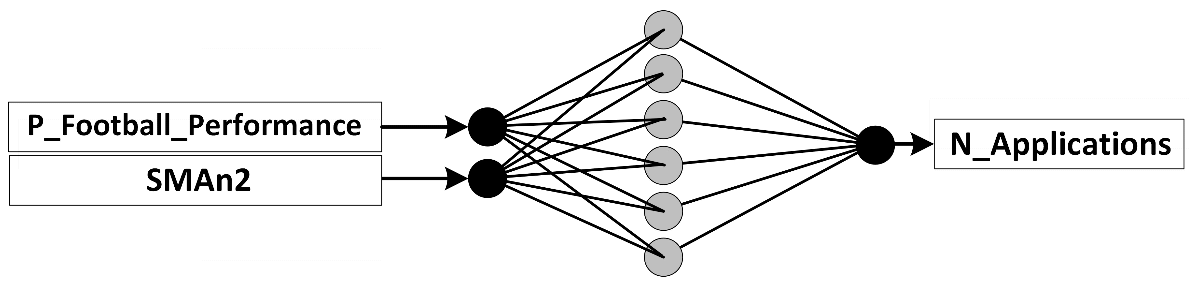
- 뉴런: 위 그림의 각 원이 뉴런에 해당. 뉴런은 입력층, 출력층, 은닉층에 위치할 수 있다.
- 입력 계층: 값이 네트워크에 입력되는 뉴런 계층. 독립 속성의 수만큼 입력 레이어에 입력 뉴런이 위치 
- 출력 계층: 네트워크로 부터 처리된 값이 나오는 뉴런 계층. 종속 속성의 수만큼 출력 레이어에 출력 뉴런이 위치.
- 은익 계층: 입력 레이어와 출력 레이어 사이에 있는 하나 이상의 뉴런 레이어. 은닉층의 수와 각 은닉층의 뉴런 수는 원하는 수준의 모델 복잡성과 계산을 위한 소요 자원에 맞게 조정된다.
- 연결: 한 층의 뉴런을 다음 수준으로 연결하는 선. 이러한 연결은 한 수준에서 다음 수준으로 철저하게 존재해야 합니다. 철저하게 왼쪽 레이어의 모든 뉴런이 오른쪽 레이어의 모든 뉴런에 연결되어 있음을 의미합니다.

##### 역전파 알고리즘(Backpropagation Algorithm)
1. 각 연결의 가중치는 먼저 -1과 1 사이의 임의의 숫자로 할당되며 MLP의 무작위 초기화라고 한다.
2. 입력층의 각 노드에 입력 패턴을 부여한다.
3. 입력 패턴 신호들이 각 노드에서 변환되어 은닉층에 전달된다.
4. 출력층에서 신호를 출력한다.
5. 출력값과 기대 목표 출력값을 비교하여 차이를 감소시키는 방향으로 각 연결의 가중치를 조정한다.
6. 출력값과 기대 목표 출력값의 차이가 오차 범위 이내로 들어오면 학습을 완료한다.

In [ ]:
from sklearn.neural_network import MLPRegressor


##### 1. 독립 및 종속 속성 선정

In [ ]:
X = ['P_Football_Performance','SMAn2']
y = 'N_Applications'


##### 2. 독립 속성(data_X) 및 종속 속성(data_y) 데이터 세트 생성

In [ ]:
data_X = msu_df[X]
data_y = msu_df[y]


##### 3. 모델 생성 및 데이터 세트 적용

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=6, max_iter=10000)
mlp.fit(data_X, data_y)


1. MLPRegressor()에는 hidden_layer_sizes=6 및 max_iter=10000의 두 개 이상의 입력이 필요
2. 첫 번째 입력(hidden_layer_sizes=6)은 네트워크 구조를 지정. 하나의 숫자만 입력하면 은닉층이 하나만 있음을 나타내고 숫자 6을 사용하면 은닉층이 6개의 뉴런을 가지고 있음을 나타냄.
3. 두 번째 입력(max_ iter=10000)은 모듈이 수렴을 완료하기 전에 최소 10,000 epoch 학습을 진행하는 것을 지정.

##### 4. 예측

In [ ]:
newData = pd.DataFrame({'P_Football_Performance':0.364,'SMAn2':17198}, index=[2022])
newData

In [ ]:
mlp.predict(newData)

# Excercise

이 연습은 ToyotaCorolla_preprocessed.csv를 데이터 세트로 사용
이 데이터 세트에는 Age, Mileage_KM, Quarterly_Tax, Weight, Fuel_Type_CNG, Fuel_Type_Diesel, Fuel_Type_Petrol 및 Price 열이 있습니다.
이 데이터 세트의 각 데이터 오브젝트는 중고 Toyota Corolla 자동차입니다. 데이터 세트를 사용하여 중고 Toyota Corolla 자동차의 가격을 예측하고 싶습니다.

1) Age: 사용연수
2) KM: 주행 거리계의 누적 킬로미터
3) FuelType: 연료 유형(가솔린, 디젤, CNG)
4) HP: 마력
5) MetColor: 메탈릭 컬러? (예=1, 아니오=0)
6) Automatic: 자동(예=1, 아니요=0)
7) CC: 입방 센티미터의 실린더 부피
8) Doors: 문 수
9) Weight: 하중(Kilograms)
10) Price: 제안 가격(유로)

##### 1) car_df라는 pandas DataFrame으로 데이터 읽기

##### 2) 선형 회귀를 이용하여 가격 속성을 예측.
- 종속변수를 Price 속성으로, 독립변수으로 Age와 Milage_KM 속성을 사용하여 선형 회귀 모델 생성
- Age: 74, KM: 124057 속성의 자동차의 가격을 예측
- 자동차 연료 유형은 휘발유

##### 3) 속성 가격을 예측하기 위해 MLP 알고리즘을 구현
- 2)과 동일한  속성을 사용하고 2)에서 제시된 동일한 새 차의 가격을 예측 
- 하나의 히든 레이어(hidden_layer_sizes)에 15개의 뉴런을 사용하고 max_iter 속성을 1000으로 설정